In [10]:
from sys import path
import os
path.append("../training")
import ATACGAN_MNIST as atacgan
import torch
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt

FloatTensor = torch.FloatTensor
LongTensor = torch.LongTensor

In [11]:
output_path = "../output/MNIST-9443302368425427241"
os.mkdir(output_path+"/results")

In [12]:
generator = atacgan.Generator()
generator.load_state_dict(torch.load(output_path + "/G", map_location=torch.device('cpu')))
discriminator = atacgan.Discriminator()
discriminator.load_state_dict(torch.load(output_path + "/D", map_location=torch.device('cpu')))

<All keys matched successfully>

In [13]:
batch_size = 1000
z = Variable(FloatTensor(np.random.normal(0, 1, (batch_size, atacgan.latent_dim))))
gen_labels = Variable(LongTensor(np.random.randint(0, atacgan.n_classes, batch_size)), requires_grad=False)
target_labels = Variable(LongTensor(np.random.randint(0, atacgan.n_classes, batch_size)), requires_grad=False)

gen_imgs = generator(z, gen_labels, target_labels)
target_classifier = atacgan.load_LeNet5().cpu()
pred_labels = target_classifier(gen_imgs)
validity, dpred_labels = discriminator(gen_imgs)

True: tensor(0) Predicted 0


Text(0.5, 0, 'Discriminator Valid: [0.67579275] Discriminator Class: 0')

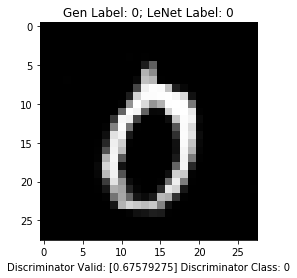

In [14]:
# Display Sample

sample_idx = 28
print("True:",gen_labels[sample_idx],"Predicted",np.argmax(pred_labels.data.cpu().numpy()[sample_idx]))
plt.imshow(gen_imgs[sample_idx][0].cpu().detach().numpy(), cmap='gray', interpolation='none')
plt.title("Gen Label: " + str(gen_labels.cpu().detach().numpy()[sample_idx]) + "; LeNet Label: " + str(np.argmax(pred_labels.data.cpu().numpy()[sample_idx])))
plt.xlabel("Discriminator Valid: " + str(validity.data.cpu().numpy()[sample_idx]) +" Discriminator Class: " + str(np.argmax(dpred_labels.data.cpu().numpy()[sample_idx])))

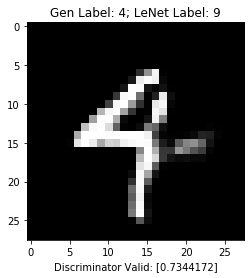

In [15]:
gen = gen_imgs.cpu().detach().numpy()
preds = pred_labels.data.cpu().numpy()
true = gen_labels.data.cpu().numpy()
v = validity.data.cpu().numpy()
dpred = dpred_labels.data.cpu().numpy()
indices = []
for i in range(len(true)):
    if np.argmax(preds[i]) != true[i] and np.argmax(dpred[i]) == true[i]:
        indices.append(i)
        plt.title("Gen Label: " + str(true[i]) + "; LeNet Label: " + str(np.argmax(preds[i])))
        plt.xlabel("Discriminator Valid: " + str(v[i]))
        plt.imshow(gen[i][0], cmap='gray')
        plt.savefig(output_path + "/results/" + str(i) + ".png")

In [16]:
print("%d / %d (%.2f) Adversarial" % (len(indices), batch_size, len(indices) / batch_size * 100))

37 / 1000 (0.04) Adversarial
